# Kansrekenen
📚 [^goodfellow]
[^goodfellow]: Deze sectie is onder andere gebaseerd op hoofdstuk 3 uit {cite}`10.1007/s10710-017-9314-z` en Hoofdstuk 1 uit {cite}`10.1117/1.2819119`

(target-probability-theory)=
Kansrekenen, waarschijnlijkheidsleer of **probabiliteitstheorie** is een wiskundig kader om uitspraken te doen over onzekerheid. Het laat toe om onzekerheid te kwantificeren en biedt axioma's om nieuwe onzekere uitspraken af te leiden uit bestaande. Het kan gezien worden als een uitbreiding van Booleaanse logica naar situaties die onzekerheid inhouden {cite}`10.1017/CBO9780511790423`.

> Kans $=$ Waarschijnlijkheid $=$ Probabiliteit  
  
Bij AI-toepassingen gebruiken we kansrekenen op twee manieren:
1. Aangezien de wetten van kansrekenen bepalen hoe AI-systemen moeten _redeneren over onzekerheid_, kunnen we bij het ontwerp van modellen handig gebruik maken van verschillende expressies uit de probabiliteitstheorie.  
We zagen reeds hoe we de logistische en {ref}`softmax <target-softmax>` activatiefuncties gebruiken zodat we de output van neurale netwerken kunnen interpreteren als een {ref}`kansverdeling <target-probability-distribution>`. Zo kunnen we de voorspelling met de hoogste kans selecteren en ook nagaan hoe zeker/onzeker voorspellingen zijn. Voor dit laatste kunnen we een beroep doen op {ref}`informatietheorie <target-information-theory>`.  
We zullen later ook zien dat we probabiliteitstheorie ook kunnen gebruiken om parameterschattingen te bekomen. 
(target-statistical-analysis)=
2. We kunnen probabiliteit ook gebruiken om het gedrag van voorgestelde AI-systemen te _analyseren_. Dit valt onder het domein van **statistische analyse**. Hierbij willen we de probabilistische eigenschappen van een systeem in kaart brengen.  
Zo kunnen we bijvoorbeeld bepaalde (ongegronde) voorkeuren (zoals gender bias) in de voorspellingen nagaan en remediëren. We kunnen probabiliteitstheorie ook gebruiken om te bewijzen dat een bepaald model beter presteert dan een ander niet zomaar bij wijze van toeval, maar op een systematische manier.

## Waarom kansrekenen?

(target-deterministic)=
Veel domeinen binnen de computerwetenschappen werken voornamelijk met entiteiten die volledig **deterministisch** (vooraf bepaald) zijn. Een programmeur kan er meestal van uitgaan dat een CPU iedere machine-instructie foutloos uitvoert. Er kunnen hardwarefouten optreden, maar die zijn zo zeldzaam dat een programmeur er geen rekening mee hoeft te houden.

(target-stochastic)=
In machine learning daarentegen moeten we altijd rekening houden met het tegenovergestelde van "deterministisch": **stochasticiteit** (onbepaaldheid, _randomness_, willekeurigheid). Er zijn drie mogelijke bronnen:

1. **Inherente stochasticiteit**  
Het systeem dat gemodelleerd wordt kan intrinsiek willekeurig zijn. Bijvoorbeeld, een kaartspel waarbij de kaarten in een random volgorde zitten.  
  
2. **Onvolledige observeerbaarheid**  
Zelfs deterministische systemen kunnen stochastisch lijken wanneer we niet alle variabelen kunnen observeren die het gedrag van het systeem bepalen. Een klassiek voorbeeld is het _Monty Hall-probleem_: een kandidaat van een spelshow moet kiezen tussen drie deuren en wint een prijs achter de gekozen deur. Twee deuren leiden naar een geit, de derde naar een auto[^monty]. De uitkomst, gegeven de keuze van de kandidaat, is deterministisch, maar vanuit het perspectief van de kandidaat is de uitkomst onzeker.  

3. **Onvolledige modellering**  
Wanneer we een model gebruiken dat sommige geobserveerde informatie moet negeren, resulteert de weggelaten informatie in onzekere voorspellingen. Bijvoorbeeld, als een robot de locatie van alle objecten rond zich exact kan observeren maar de ruimte discretiseert (in cellen opdeelt) bij het voorspellen van toekomstige locaties, dan zijn de voorspellingen automatisch onzeker binnen de dimensies van de cellen.

[^monty]: Het [probleem](https://en.wikipedia.org/wiki/Monty_Hall_problem) gaat over een probabilistische puzzel en werd louter omwille van het thema naar de presentator van de Amerikaanse tv-show _Let's Make a Deal_ vernoemd. De oorspronkelijke formulering luidt: _Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice_

:::{important}
**In veel situaties is het praktischer om een eenvoudige _onzekere_ regel te gebruiken dan een complexe zekere regel, zelfs als de werkelijke regel deterministisch is**.  
De regel "_De meeste vogels vliegen_" is gemakkelijk te implementeren en algemeen bruikbaar. Een regel in de vorm "_Vogels vliegen, behalve zeer jonge vogels die nog niet geleerd hebben te vliegen, zieke of gewonde vogels..._" is moeilijk om te implementeren, vatbaar voor uitzonderingen en leidt snel tot fouten.
:::

## Frequentistische vs. Bayesiaanse probabiliteit

Kansrekenen was oorspronkelijk bedoeld om de frequentie van gebeurtenissen te analyseren, zoals bijvoorbeeld de kans op een bepaalde combinatie van kaarten in een pokerspel. Dit soort gebeurtenissen zijn meestal _herhaalbaar_: als we zeggen dat een bepaalde gebeurtenis een kans $p=0.4$ heeft om voor te vallen, wil dat zeggen dat als we het experiment een oneindig aantal keer zouden _herhalen_, we die gebeurtenis in $40\%$ van de gevallen zullen tegenkomen.  

(target-frequentist-probability)=
> Deze benadering beschouwt probabiliteit als de relatieve frequentie waarmee gebeurtenissen plaatsvinden en wordt daarom de **{u}`frequentistische`** benadering genoemd.
  
Dit soort redeneringen over probabiliteit kunnen we echter niet toepassen bij uitkomsten die _niet herhaalbaar_ zijn. Neem bijvoorbeeld de situatie waarbij we zeggen dat er een $40\%$ kans is dat de nieuwe GTA versie morgen uitkomt. Hier heeft $p=0.4$ geen betrekking op een frequentie (we kunnen de situatie niet een oneindig aantal keren repliceren), maar op een bepaalde _mate van geloof_ (_degree of belief_).

(target-bayesian-probability)=
> Deze benadering heet de **{u}`Bayesiaanse`**[^bayes] interpretatie van probabiliteit. Hier heeft probabiliteit betrekking op de **mate van geloof** (_degree of belief_) in een bepaalde hypothese, waarbij $1$ absolute zekerheid aanduidt en $0$ absolute zekerheid dat iets niet het geval is. 

[^bayes]: De term [_Bayesiaans_](https://en.wikipedia.org/wiki/Bayesian_probability) is afgeleid van de 18e-eeuwse Engelse wiskundige en theoloog Thomas Bayes, die de eerste wiskundige behandeling gaf van een niet-triviaal probleem van statistische data-analyse met behulp van wat nu bekend staat als Bayesiaanse inferentie. Wiskundige Pierre-Simon Laplace was pionier van en populariseerde wat nu Bayesiaanse kansrekening wordt genoemd.

:::{important}
{cite}`10.1119/1.1990764`, bijvoorbeeld, heeft aangetoond dat als we in het geval van Bayesiaanse probabiliteit op zoek gaan naar een wiskundig systeem om te rekenen met cijfers die een _degree of belief_ uitdrukken, we bij dezelfde regels uitkomen als op basis van een frequentistische interpretatie. Dit is een rechtstreeks gevolg als we uitgaan van een reeks algemeen wenselijke eigenschappen (zoals: _Als $A$ zekerder is dan $B$ en $B$ zekerder is dan $C$, dan moet $A$ zekerder zijn dan $C$_).
:::

## Random variabelen

(target-random-variable)=
Een **random, kans- of stochastische variabele** is een variabele die willekeurig verschillende waarden kan aannemen. We duiden de random variabele aan met een kleine letter in _plain text_ (bv. $\text{x}$), en specifieke realisaties met subscripts (bv. $x_1$ en $x_2$). In het geval van vectoren gebruiken we $\pmb{\text{x}}$ om de variabele aan te duiden en $\pmb{x}$ voor realisaties.

Random variabelen kunnen **discreet** of **continu** zijn:

(target-discrete-random-variable)=
- **Discrete random variabele**: Heeft een eindig of _aftelbaar oneindig_[^countable_inf] aantal waarden. Deze waarden hoeven niet noodzakelijk integers te zijn; ze kunnen ook {ref}`nominaal <target-nominal>` zijn.
(target-continuous-random-variable)=
- **Continue random variabele**: Geassocieerd met een reële waarde.

[^countable_inf]: Een aftelbaar oneindig aantal waarden verwijst naar een verzameling met oneindig veel elementen, die echter op een systematische manier genummerd of geteld kunnen worden. Een bekend voorbeeld hiervan is de verzameling van de natuurlijke getallen $(1,2,3,\dots)$ of de gehele getallen $(\dots ,-2,-1,0,1,2,\dots)$. Het belangrijkste kenmerk is dat er een één-op-één correspondentie bestaat tussen deze verzameling en de verzameling van natuurlijke getallen.

## Kansverdelingen

(target-probability-distribution)=
Een **kansverdeling** (_probability distribution_) beschrijft hoe waarschijnlijk een random variabele of set van random variabelen elk van zijn mogelijke waarden aanneemt. De manier waarop we kansverdelingen beschrijven verschilt naargelang de random variabele discreet of continu is.

### Discrete variabelen: _Probability Mass Functions_

(target-pmf)=
Een kansverdeling over discrete waarden wordt beschreven met een **_probability mass function_** (PMF). We duiden deze functies aan met een hoofdletter $P$. 

De PMF verbindt de verschillende waarden die een discrete random variabele kan aannemen met de kans dat de variabele die waarden aanneemt. De kans dat $\text{x}=x$ wordt genoteerd als $P(x)$, waarbij:
- Een kans van $1$ aanduidt dat $\text{x}=x$ zeker is
- Een kans van $0$ aanduidt dat $\text{x}=x$ onmogelijk is

:::{important} Eigenschappen  
Een functie $P$ is een _Probability Mass Function_ (PMF) voor random variabele $\text{x}$ als:

1. Het domein van $P$ de set is van alle mogelijke waarden van $\text{x}$
2. $\forall x \in \text{x}, 0 \leq P(x) \leq 1$
3. $\sum_{x \in \text{x}} P(x) = 1$

(target-prob-complement-rule)=
🧮 Uit (3) volgt de zogenaamde **complementregel** bij kansrekenen:

$$
P(\text{x} \neq x_i) = 1 - P(\text{x} = x_i)
$$
:::

:::{note} 🌍
:icon: false
:class: simple
Een typisch voorbeeld van een discrete kansvariabele is de uitkomst van een gooi met een dobbelsteen. Ongeacht het feit of we met een eerlijke of oneerlijke dobbelsteen te maken hebben, zal de uitkomst met 100% zekerheid $1$, $2$, $3$, $4$, $5$ of $6$ zijn: 

$$
P(x \in \{1, 2, 3, 4, 5, 6\}) = 1
$$

Als we naar de kansen op het niveau van de individuele waarden kijken, speelt het al dan niet eerlijk zijn van de dobbelsteen _wel_ een rol.  
  
Als de dobbelsteen _eerlijk_ is, zal iedere waarde een gelijke kans hebben om op te treden, namelijk $P(x) = \frac{1}{6}$. Dat volgt uit de eigenschap dat de som van alle kansen $1$ moet zijn en dat we hier op zoek zijn naar een gelijke kans voor iedere waarde:

$$
\begin{align}
\sum_{x \in \{1,2,3,4,5,6\}} P(x) &= 1 \cr
P(\text{x}=1) + P(\text{x}=2) + P(\text{x}=3) + P(\text{x}=4) + P(\text{x}=5) + P(\text{x}=6) &= 1 \cr
6 P(\text{x}=1) &= 1 \cr
P(\text{x}=1) & = \frac{1}{6}
\end{align}
$$

We krijgen dus:

$$
P(\text{x}=1) = P(\text{x}=2) = P(\text{x}=3) = P(\text{x}=4) = P(\text{x}=5) = P(\text{x}=6) = \frac{1}{6}
$$

Als we bijvoorbeeld 60 keer de dobbelsteen gooien, verwachten we dat iedere waarde ongeveer $60 \times \frac{1}{6} = 10$ keer zal voorkomen. We spreken hier over een {u}`uniforme` PMF. Een dergelijke PMF over $k$ verschillende waarden geeft iedere waarde een gelijke kans:

$$
P(\text{x} = x_i) = \frac{1}{k}
$$
  
Bij een _oneerlijke_ dobbelsteen, zullen de verschillende waarden een ongelijke kans hebben om op te treden. Stel dat we te maken hebben met een dobbelsteen waarbij de kans op $6$ twee keer zo groot is als de kans op eender welke andere waarde. Hoe ziet de PMF er dan uit? We kunnen dit eenvoudig uitrekenen aangezien we weten dat:
- de som van alle kansen $1$ moet zijn
- we voor alle uitkomsten die niet $6$ zijn een zelfde waarde zoeken
- de kans op $6$ dubbel zo groot is

$$
\begin{align}
\sum_{x \in \{1,2,3,4,5,6\}} P(x) &= 1 \cr
P(\text{x}=1) + P(\text{x}=2) + P(\text{x}=3) + P(\text{x}=4) + P(\text{x}=5) + P(\text{x}=6) &= 1 \cr
5 P(\text{x}=1) + 2 P(\text{x}=1) &= 1 \cr
P(\text{x}=1) (5 + 2) & = 1 \cr
P(\text{x}=1) & = \frac{1}{7}
\end{align}
$$

We krijgen dus:

$$
\begin{align}
P(\text{x}=1) = P(\text{x}=2) = P(\text{x}=3) = P(\text{x}=4) = P(\text{x}=5) &= \frac{1}{7} \cr
P(\text{x}=6) &= \frac{2}{7} 
\end{align}
$$
:::

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

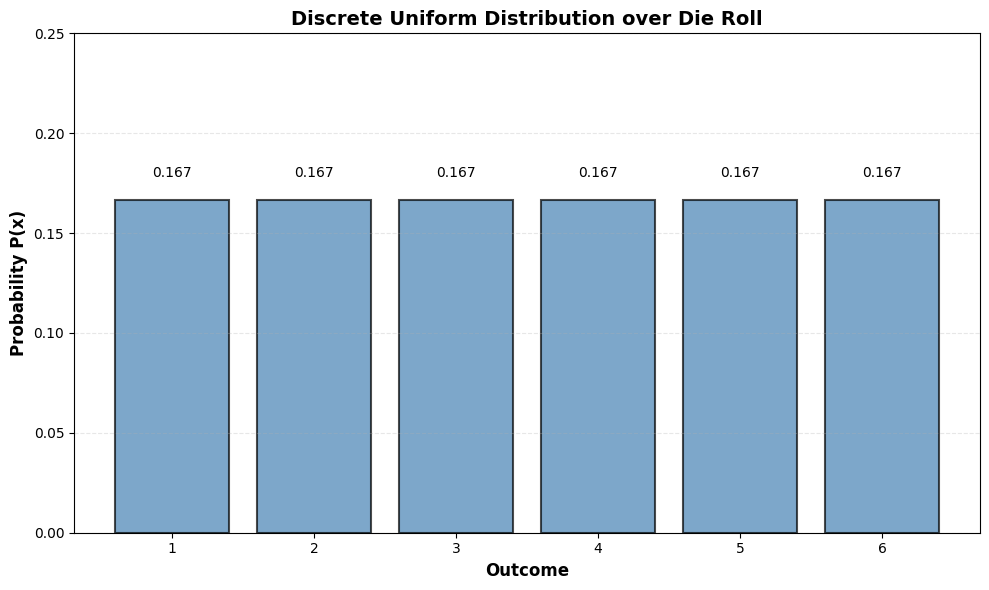

Sum of probabilities: 1.0 (must be 1.0)


In [2]:
# Example: Discrete uniform distribution over a die roll
k = 6  # Six-sided die
outcomes = np.arange(1, k + 1)
probabilities = np.ones(k) / k

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(outcomes, probabilities, color="steelblue", alpha=0.7, edgecolor="black", linewidth=1.5)
ax.set_xlabel("Outcome", fontsize=12, fontweight="bold")
ax.set_ylabel("Probability P(x)", fontsize=12, fontweight="bold")
ax.set_title("Discrete Uniform Distribution over Die Roll", fontsize=14, fontweight="bold")
ax.set_xticks(outcomes)
ax.set_ylim(0, 0.25)
ax.grid(axis="y", alpha=0.3, linestyle="--")

# Add probability values on bars
for outcome, prob in zip(outcomes, probabilities, strict=False):
    ax.text(outcome, prob + 0.01, f"{prob:.3f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

print(f"Sum of probabilities: {probabilities.sum():.1f} (must be 1.0)")

:::{important}
Als we in het voorbeeld van een eerlijke dobbelsteen de kans willen berekenen op een uitkomst die {u}`oneven is of $6$`, volstaat het om de individuele kansen die daarmee overeenstemmen op te tellen:

$$
P(x=1) + P(x=3) + P(x=5) + P(x=6) = \frac{4}{6} = \frac{2}{3}
$$

Dit kunnen we enkel doen omdat we hier te maken hebben met de kans op _niet-overlappende_ uitkomsten. Stel dat we de kans op een {u}`oneven waarde of $5$` willen berekenen, dan moeten we er rekening mee houden dat $5$ in beide sets aanwezig is en dus maar één keer geteld mag worden.  

(target-prob-sum-rule)=
🧮 De algemene **somregel** bij kansrekenen stelt:

$$
P(x \in A \cup B) = P(x \in A) + P(x \in B) - P(x \in A \cap B)
$$
:::

### Continue variabelen: _Probability Density Functions_

(target-pdf)=
Voor continue random variabelen gebruiken we een **_probability density function_** (PDF) in plaats van een _probability mass function_. We duiden deze functies aan met een kleine letter $p$.

:::{important} Eigenschappen
Een functie $p$ is een _Probability Density Function_ (PDF) voor random variabele $\text{x}$ als:

1. Het domein van $p$ de set is van alle mogelijke toestanden van $\text{x}$
2. $\forall x \in \text{x}, p(x) \geq 0$.
3. $\int p(x)dx = 1$  
  
⚠️ Merk op dat we niet eisen dat $p(x) \leq 1$  
  
Een PDF $p(x)$ geeft _niet_ rechtstreeks de probabiliteit van een specifieke waarde voor $\text{x}$ zoals een PMF. Bij een continue random variabele is de kans om een exacte waarde $x$ te observeren in feite altijd $0$. De PDF geeft in plaats daarvan de {u}`kansdichtheid` als output. We moeten de PDF _integreren_ (denk: sommeren) om de eigenlijke kans van een set punten binnen een bepaald interval te vinden. De kans dat $x$ in een interval $[a,b]$ ligt wordt gegeven door:

$$
P(x \in [a,b]) = \int_a^b p(x)dx
$$
De probabiliteit bij een PDF wordt met andere woorden gegeven als het _volume onder de functie_.  
:::

Voor een uniforme distributie op interval $[a, b]$ met $b > a$ krijgen we:

$$
u(x; a, b) = \begin{cases}
\frac{1}{b-a} & \text{als } x \in [a,b] \\
0 & \text{anders}
\end{cases}
$$

We noteren dit als $\text{x} \sim U(a,b)$.

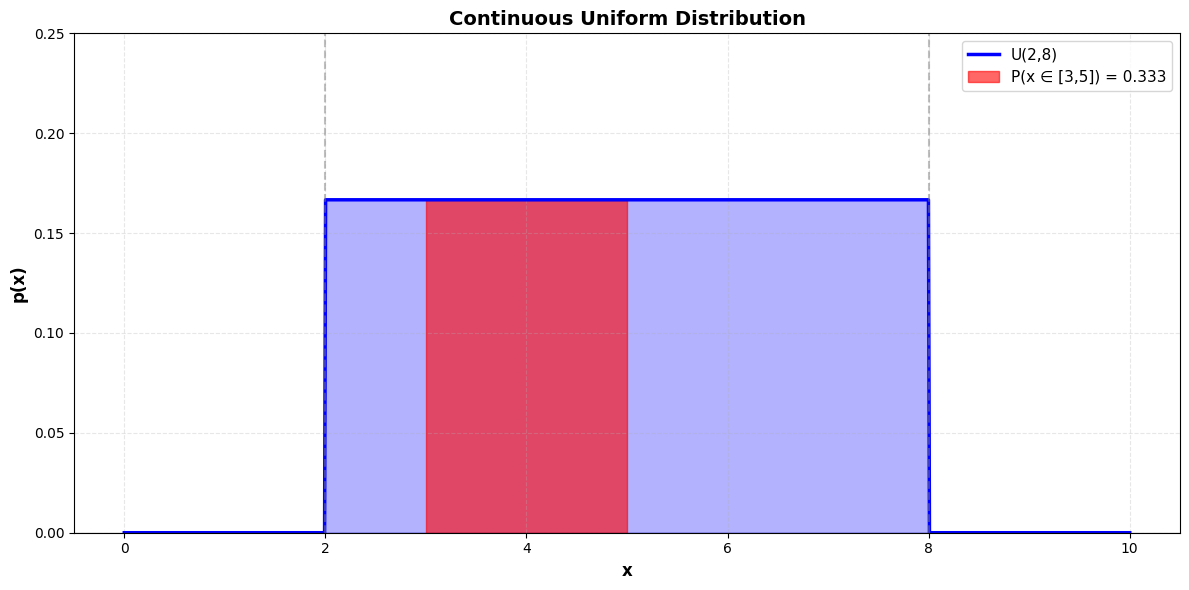

Height of PDF in [2,8]: 0.1667
Integral over entire domain: 1.0


In [3]:
# Example: Continuous uniform distribution
a, b = 2, 8
x = np.linspace(0, 10, 1000)
pdf = np.where((x >= a) & (x <= b), 1 / (b - a), 0)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, pdf, "b-", linewidth=2.5, label=f"U({a},{b})")
ax.fill_between(x, pdf, alpha=0.3, color="blue")

# Highlight probability of interval [3, 5]
x_interval = x[(x >= 3) & (x <= 5)]
pdf_interval = pdf[(x >= 3) & (x <= 5)]
ax.fill_between(
    x_interval,
    pdf_interval,
    alpha=0.6,
    color="red",
    label=f"P(x ∈ [3,5]) = {(5 - 3) / (b - a):.3f}",
)

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("p(x)", fontsize=12, fontweight="bold")
ax.set_title("Continuous Uniform Distribution", fontsize=14, fontweight="bold")
ax.set_ylim(0, 0.25)
ax.grid(alpha=0.3, linestyle="--")
ax.legend(fontsize=11)
ax.axhline(y=0, color="black", linewidth=0.8)
ax.axvline(x=a, color="gray", linestyle="--", alpha=0.5)
ax.axvline(x=b, color="gray", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

print(f"Height of PDF in [{a},{b}]: {1 / (b - a):.4f}")
print(f"Integral over entire domain: {(b - a) * (1 / (b - a)):.1f}")

:::{warning}
Het feit dat we niet met kansen, maar met kansdichtheden te maken hebben impliceert dat $p(x) > 1$ kan zijn. Neem bijvoorbeeld een uniforme distributie

$$
u(x; 0, 0.5) = \begin{cases}
2 & \text{als } x \in [0, 0.5] \\
0 & \text{anders}
\end{cases}
$$

Hier is dus $p(x) = 2$. De kans op een waarde binnen het interval $[0, 0.5]$ is echter $1$:

$$
\int_{0}^{0.5} 2 dx = 2 \times 0.5 = 1
$$
:::

### Theoretische en empirische kansverdelingen

In het algemene geval weten we bij observaties van random variabelen, behalve de discrete of continue eigenschap, nooit vooraf met welke kansverdeling we precies te maken hebben. In sommige gevallen wordt zonder meer een assumptie gemaakt, bijvoorbeeld de aanname dat we met een eerlijke dobbelsteen te maken hebben en de PMF dus neerkomt op:
$$
\begin{aligned}
P(\text{x} = x_i) &= \frac{1}{k} \cr
&= \frac{1}{6}
\end{aligned}
$$

In het geval van continue random variabelen wordt vaak de assumptie gemaakt dat de PDF een Gauss- of normaalverdeling volgt met als algemene vorm:
(target-normal-function)=

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
Dit zijn beide voorbeelden van _theoretische_ distributies. We zullen later zien dat dergelijke volledig wiskundig beschreven verdelingen interessante implicaties hebben in de context van ML.  
    
Als we over {u}`theoretische kansverdelingen` spreken, gaat het telkens over een {u}`hypothese` (de {u}`populatieverdeling` genoemd in de statistiek). In realiteit hebben we altijd te maken met {u}`steekproeven` (_samples_) en steekproefverdelingen. Als we de assumptie maken dat de data een bepaalde theoretische verdeling volgt, betekent dat dat we ervan uitgaan dat de steekproefverdeling die bepaalde populatieverdeling zal benaderen als we de steekproef oneindig groot maken.  
  
Wanneer we een steekproef nemen, kunnen we de geobserveerde kansen {u}`binnen` de steekproef weergeven.  

Bij een discrete random variabele kunnen we simpelweg voor iedere mogelijke uitkomst de frequentie binnen de steekproef berekenen en visualiseren met een staafdiagram. Bij continue random variabelen maken we meestal gebruik van een histogram. We berekenen dan de frequenties binnen zelf gekozen intervallen (_bins_).  
  
In beide gevallen spreken we dan over de {u}`empirische kansverdeling`. Het grote verschil met theoretische verdelingen is dat ze, buiten de algemene eigenschappen van PMFs en PDFs, geen verdere wiskundige specificaties hebben. Ze worden dan ook meestal gebruikt om na te gaan met welke theoretische verdeling ze het best overeenkomen zodat met de specificaties van die verdeling verder gewerkt kan worden.

:::{note} 🌍
:icon: false
:class: simple
Stel dat we te maken hebben met een populatie waarin de lichaamslengte (de continue random variabele $\text{x}$) een normaalverdeling volgt met gemiddelde $\mu=175$cm en standaardafwijking $\sigma=10$cm. Als we daaruit een steekproef nemen, kunnen we gebruik maken van een histogram om de _empirische_ kansverdeling te visualiseren.  
Als we de intervallen (_bins_) van ons histogram te klein maken, gegeven de steekproefgrootte, zullen we bins met een frequentie 0 tegenkomen. De correcte keuze van bin-locaties en -breedtes kan een grote rol spelen in de evaluatie van de empirische verdeling (met het oog op een passende theoretische verdeling).
:::

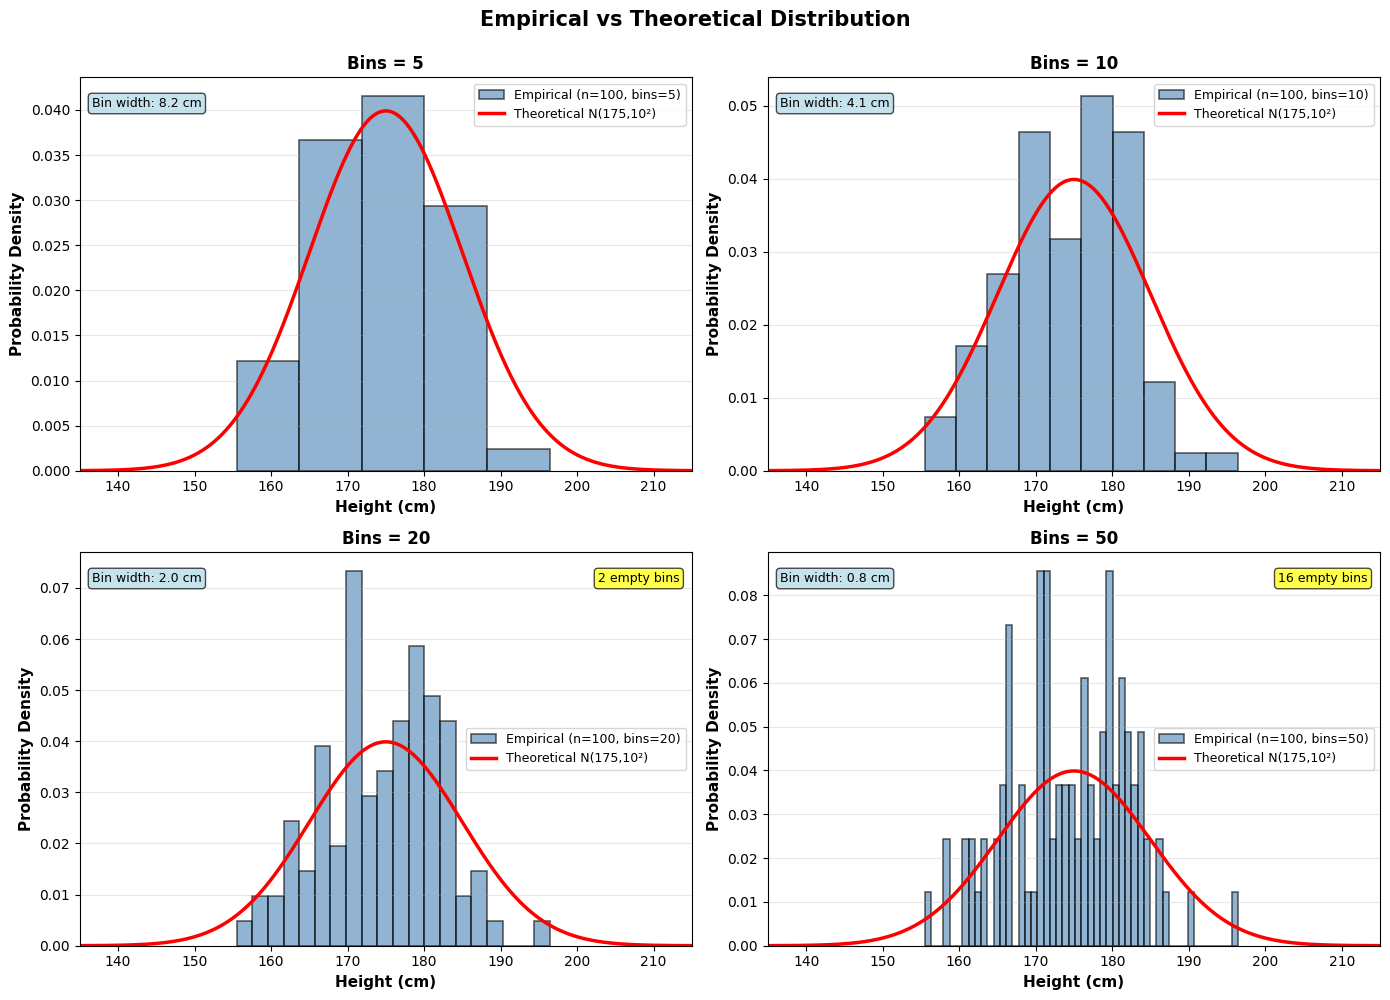

In [4]:
# Example: Theoretical vs Empirical Distribution
# Population parameters
mu = 175  # mean height in cm
sigma = 10  # standard deviation in cm

# Generate samples
rng = np.random.default_rng(42)
sample_size = 100
sample = rng.normal(mu, sigma, sample_size)

# Create figure with different bin sizes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Theoretical distribution curve
x_theory = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y_theory = stats.norm.pdf(x_theory, mu, sigma)

bin_sizes = [5, 10, 20, 50]
for ax, n_bins in zip(axes.flatten(), bin_sizes, strict=False):
    # Plot histogram (empirical distribution)
    counts, bins, patches = ax.hist(
        sample,
        bins=n_bins,
        density=True,
        alpha=0.6,
        color="steelblue",
        edgecolor="black",
        linewidth=1.2,
        label=f"Empirical (n={sample_size}, bins={n_bins})",
    )

    # Plot theoretical distribution
    ax.plot(x_theory, y_theory, "r-", linewidth=2.5, label=f"Theoretical N({mu},{sigma}²)")

    # Styling
    ax.set_xlabel("Height (cm)", fontsize=11, fontweight="bold")
    ax.set_ylabel("Probability Density", fontsize=11, fontweight="bold")
    ax.set_title(f"Bins = {n_bins}", fontsize=12, fontweight="bold")
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3, axis="y")
    ax.set_xlim(mu - 4 * sigma, mu + 4 * sigma)

    # Highlight empty bins if any
    empty_bins = np.sum(counts == 0)
    if empty_bins > 0:
        ax.text(
            0.98,
            0.95,
            f"{empty_bins} empty bins",
            transform=ax.transAxes,
            fontsize=9,
            bbox={"boxstyle": "round", "facecolor": "yellow", "alpha": 0.7},
            ha="right",
            va="top",
        )

    # Show bin width
    bin_width = bins[1] - bins[0]
    ax.text(
        0.02,
        0.95,
        f"Bin width: {bin_width:.1f} cm",
        transform=ax.transAxes,
        fontsize=9,
        bbox={"boxstyle": "round", "facecolor": "lightblue", "alpha": 0.7},
        ha="left",
        va="top",
    )

plt.suptitle("Empirical vs Theoretical Distribution", fontsize=15, fontweight="bold", y=0.995)
plt.tight_layout()
plt.show()

## Combinaties van kansvariabelen
Tot nu toe hebben we gekeken naar individuele kansvariabelen. De regels van kansrekenen worden pas echt interessant als we naar combinaties van kansvariabelen kijken.

:::{note} 🌍
:icon: false
:class: simple
Stel dat we bij een spel niet één, maar twee eerlijke dobbelstenen gooien. We hebben dan te maken met twee kansvariabelen $\text{x}$ en $\text{y}$. Wat is de kans dat beide dobbelstenen op $6$ uitkomen?

Bij twee eerlijke dobbelstenen krijgen we $6 \times 6 = 36$ mogelijke uitkomsten. In de veronderstelling dat iedere combinatie een gelijke kans heeft, krijgen we:

| $\text{x} \backslash \text{y}$ | $y=1$ | $y=2$ | $y=3$ | $y=4$ | $y=5$ | $y=6$ |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| $x=1$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |
| $x=2$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |
| $x=3$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |
| $x=4$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |
| $x=5$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |
| $x=6$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |

De kans dat beide dobbelstenen op $6$ uitkomen is dus $P(x=6, y=6) = \frac{1}{36} \approx 0.0278$ of ongeveer $2.78\%$.
:::

Het voorbeeld illustreert dat we bij twee of meerdere kansvariabelen de verdeling als een gezamenlijke (_joint_) distributie kunnen zien. Die distributie behoudt de eigenschappen van een enkelvoudige PMF of PDF.

:::{note} 🌍
:icon: false
:class: simple
Als we in het bovenstaande voorbeeld de kans willen berekenen op een uitkomst die samen $7$ geeft, volstaat het om de individuele kansen die daarmee overeenstemmen op te tellen (zie {ref}`som regel <target-prob-sum-rule>`):

$$
P(x=1, y=6) + P(x=2, y=5) + P(x=3, y=4) + P(x=4, y=3) + P(x=5, y=2) + P(x=6, y=1) = \frac{6}{36} = \frac{1}{6}
$$
:::

### Marginale kans

(target-marginal-probability)=
Soms kennen we de kansverdeling over een set van meerdere variabelen en willen we de verdeling over slechts een deelverzameling ervan kennen. De kansverdeling over de deelverzameling wordt de **marginale kansverdeling** genoemd.

Voor discrete random variabelen $\text{x}$ en $\text{y}$ en hun gezamenlijke verdeling $P(x, y)$ kunnen we de marginale verdeling $P(x)$ vinden met de {ref}`som regel <target-prob-sum-rule>`:

$$
\forall x \in \text{x}, P(x) = \sum_y P(x, y)
$$

Voor continue variabelen gebruiken we integratie in plaats van sommatie:

$$
p(x) = \int p(x, y)dy
$$

:::{note}
De naam "marginale kans" komt van het proces om marginale kansen op papier te berekenen. Wanneer de waarden van $P(x,y)$ in een grid worden geschreven met verschillende waarden van $x$ in rijen en verschillende waarden van $y$ in kolommen, is het natuurlijk om over een rij te sommeren en $P(x)$ in de marge van het papier rechts van de rij te schrijven.
:::



### Conditionele kans

(target-conditional-probability)=
In veel gevallen zijn we geïnteresseerd in de kans van een gebeurtenis, **gegeven dat** een andere gebeurtenis plaatsvond. Dit heet een **conditionele kans**.

We noteren de conditionele kans dat $\text{y}=y$ gegeven $\text{x}=x$ als $P(\text{y}=y|\text{x}=x)$. Deze wordt berekend met de formule:

$$
P(\text{y}=y|\text{x}=x) = \frac{P(\text{y}=y, \text{x}=x)}{P(\text{x}=x)}
$$

:::{warning}
De conditionele kans is alleen gedefinieerd wanneer $P(\text{x}=x) > 0$. We kunnen de kans niet berekenen geconditioneerd op een gebeurtenis die nooit gebeurt.
:::

:::{important}
Uit de definitie van de conditionele kans volgt dat de gezamenlijke distributie van twee kansvariabelen ontleed kan worden in het product van de conditionele probabiliteit en de marginale probabiliteit:

$$
\begin{align}
P(x, y) &= P(y|x)P(x) \cr
&= P(x|y)P(y)
\end{align}
$$

Als we dit uitbreiden naar drie variabelen, krijgen we:

$$
\begin{align}
P(x,y,z) &= P(x|y,z)P(y,z) \\
&= P(x|y,z)P(y|z)P(z)
\end{align}
$$

(target-prob-prod-rule)=
Dit brengt ons bij de vaststelling dat elke gezamenlijke kansverdeling kan worden ontleed in conditionele distributies over slechts één variabele:

$$
P(x^{(1)}, \ldots, x^{(n)}) = P(x^{(1)})\prod_{i=2}^{n}P(x^{(i)}|x^{(1)}, \ldots, x^{(i-1)})
$$

🧮 Deze observatie staat bekend als de **productregel** bij kansrekenen.
:::

:::{note} 🌍
:icon: false
:class: simple
Hieronder illustreren we het principe van marginale en conditionele kansen in het geval van twee random variabelen die samen een zogenaamde bivariate Gauss-verdeling vormen. 
:::

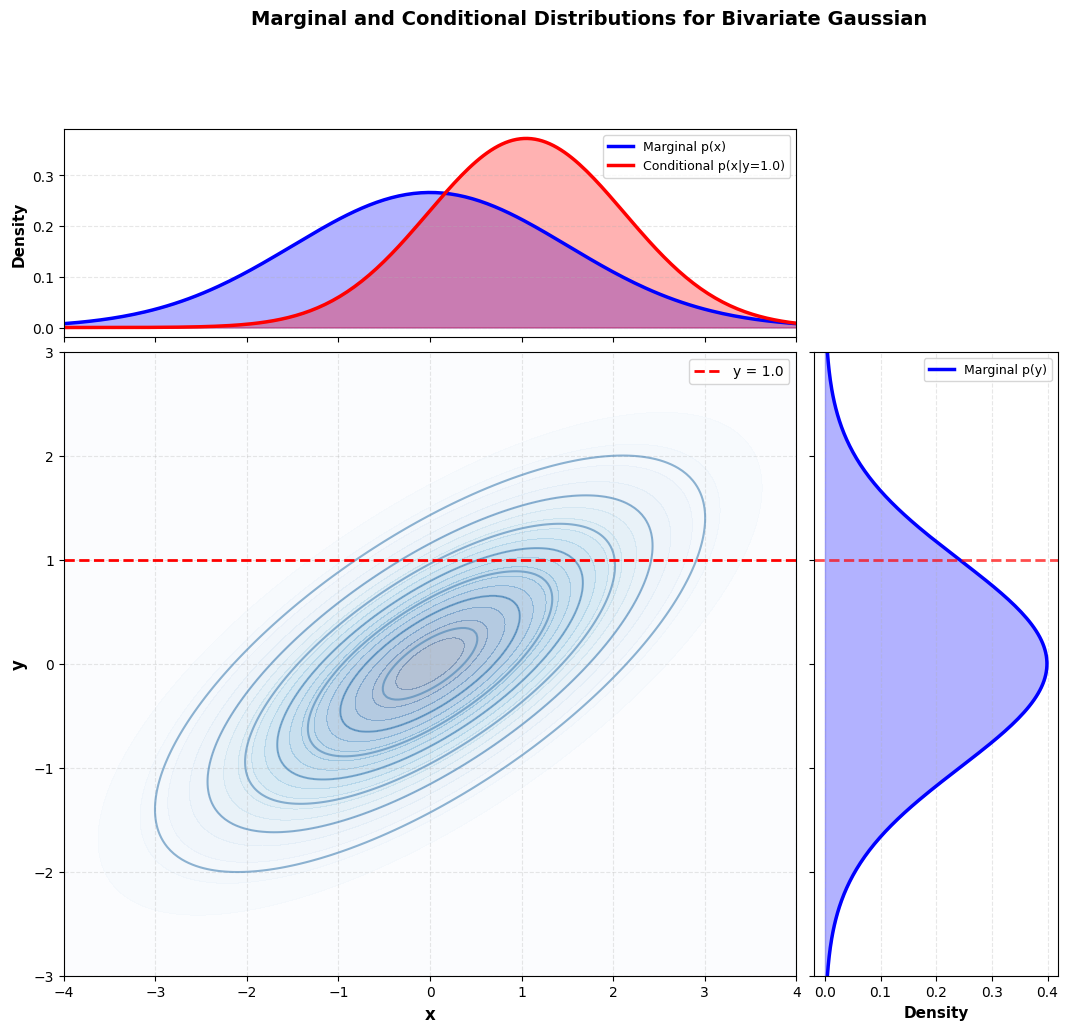

In [5]:
# Example: Marginal and Conditional Distributions with 2D Gaussian
# Create a 2D Gaussian distribution with correlation

# Parameters for bivariate normal distribution
mu_x, mu_y = 0, 0  # means
sigma_x, sigma_y = 1.5, 1.0  # standard deviations
rho = 0.7  # correlation coefficient

# Covariance matrix
cov_matrix = np.array(
    [[sigma_x**2, rho * sigma_x * sigma_y], [rho * sigma_x * sigma_y, sigma_y**2]]
)

# Create grid for evaluation
x = np.linspace(-4, 4, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Compute joint PDF
rv = stats.multivariate_normal([mu_x, mu_y], cov_matrix)
Z = rv.pdf(pos)

# Marginal distributions
pdf_x = stats.norm.pdf(x, mu_x, sigma_x)
pdf_y = stats.norm.pdf(y, mu_y, sigma_y)

# Conditional distribution: p(x|y=y0)
y0 = 1.0  # specific value of y
mu_x_given_y0 = mu_x + rho * (sigma_x / sigma_y) * (y0 - mu_y)
sigma_x_given_y0 = sigma_x * np.sqrt(1 - rho**2)
pdf_x_given_y0 = stats.norm.pdf(x, mu_x_given_y0, sigma_x_given_y0)

# Create figure with custom layout
fig = plt.figure(figsize=(14, 12))
gs = fig.add_gridspec(
    3, 3, height_ratios=[1, 3, 0.3], width_ratios=[3, 1, 0.3], hspace=0.05, wspace=0.05
)

# Main plot: joint distribution with contours
ax_joint = fig.add_subplot(gs[1, 0])
contour = ax_joint.contour(X, Y, Z, levels=8, colors="steelblue", linewidths=1.5, alpha=0.6)
contourf = ax_joint.contourf(X, Y, Z, levels=20, cmap="Blues", alpha=0.3)

# Add line indicating y=y0
ax_joint.axhline(y=y0, color="red", linestyle="--", linewidth=2, label=f"y = {y0}")

# Styling
ax_joint.set_xlabel("x", fontsize=12, fontweight="bold")
ax_joint.set_ylabel("y", fontsize=12, fontweight="bold")
ax_joint.set_xlim(-4, 4)
ax_joint.set_ylim(-3, 3)
ax_joint.grid(alpha=0.3, linestyle="--")
ax_joint.legend(fontsize=10, loc="upper right")

# Top plot: marginal p(x) and conditional p(x|y=y0)
ax_top = fig.add_subplot(gs[0, 0], sharex=ax_joint)
ax_top.plot(x, pdf_x, "b-", linewidth=2.5, label="Marginal p(x)")
ax_top.fill_between(x, pdf_x, alpha=0.3, color="blue")
ax_top.plot(x, pdf_x_given_y0, "r-", linewidth=2.5, label=f"Conditional p(x|y={y0})")
ax_top.fill_between(x, pdf_x_given_y0, alpha=0.3, color="red")
ax_top.set_ylabel("Density", fontsize=11, fontweight="bold")
ax_top.set_xlim(-4, 4)
ax_top.legend(fontsize=9, loc="upper right")
ax_top.grid(alpha=0.3, linestyle="--", axis="y")
ax_top.tick_params(labelbottom=False)

# Right plot: marginal p(y)
ax_right = fig.add_subplot(gs[1, 1], sharey=ax_joint)
ax_right.plot(pdf_y, y, "b-", linewidth=2.5, label="Marginal p(y)")
ax_right.fill_betweenx(y, pdf_y, alpha=0.3, color="blue")
ax_right.axhline(y=y0, color="red", linestyle="--", linewidth=2, alpha=0.7)
ax_right.set_xlabel("Density", fontsize=11, fontweight="bold")
ax_right.set_ylim(-3, 3)
ax_right.legend(fontsize=9, loc="upper right")
ax_right.grid(alpha=0.3, linestyle="--", axis="x")
ax_right.tick_params(labelleft=False)

plt.suptitle(
    "Marginal and Conditional Distributions for Bivariate Gaussian",
    fontsize=14,
    fontweight="bold",
    y=0.98,
)
plt.show()

### Onafhankelijkheid
(target-independence)=
Van zodra we met twee of meerdere random variabelen te maken krijgen, is het belangrijk om te weten of er al dan niet sprake is van afhankelijkheid tussen de waarden. Wanneer we de lichaamslengte en armlengte in een steekproef meten, zal er een sterke positieve samenhang zijn tussen de uitkomsten van die kansvariabelen. Als we daarentegen de uitkomst van twee gooien met een dobbelsteen tegen elkaar uitzetten, zal er geen sprake zijn van samenhang: de uitkomst van de ene observatie is onafhankelijk van de uitkomst van de andere.  
  
Wanneer twee **kansvariabelen onafhankelijk** zijn, geldt dat de conditionele verdeling gelijk is aan de marginale verdeling:  
  
Als

$$
x \perp y
$$

dan

$$
P(x|y) = P(x)
$$

Dit impliceert dat de gezamenlijke kansverdeling geschreven kan worden als het product van de marginale verdelingen:  
  
Als

$$
x \perp y
$$

dan

$$
\begin{align}
P(x, y) &= P(x|y)P(y)\cr
&=P(x)P(y)
\end{align}
$$

:::{note} 🌍
:icon: false
:class: simple
Hieronder illustreren we het principe van onafhankelijkheid in het geval van twee random variabelen die samen een bivariate Gauss-verdeling vormen met correlatie $\rho=0$. In dit geval zijn de conditionele en marginale verdelingen identiek.
:::

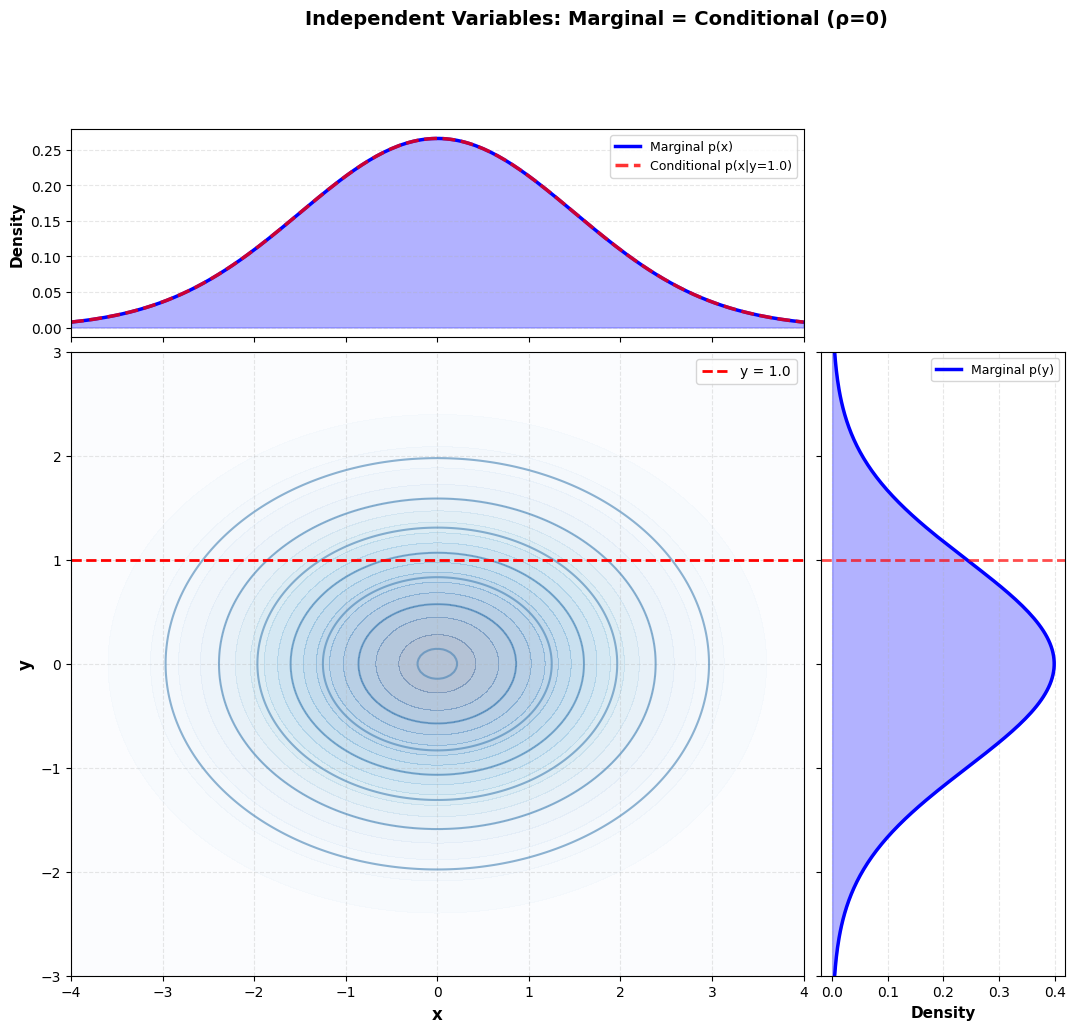

In [6]:
# Example: Independent Variables - Marginal equals Conditional
# Create a 2D Gaussian distribution with NO correlation (rho=0)

# Parameters for bivariate normal distribution with independence
mu_x, mu_y = 0, 0  # means
sigma_x, sigma_y = 1.5, 1.0  # standard deviations
rho = 0.0  # NO correlation - variables are independent

# Covariance matrix (diagonal for independent variables)
cov_matrix = np.array(
    [[sigma_x**2, rho * sigma_x * sigma_y], [rho * sigma_x * sigma_y, sigma_y**2]]
)

# Create grid for evaluation
x = np.linspace(-4, 4, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Compute joint PDF
rv = stats.multivariate_normal([mu_x, mu_y], cov_matrix)
Z = rv.pdf(pos)

# Marginal distributions
pdf_x = stats.norm.pdf(x, mu_x, sigma_x)
pdf_y = stats.norm.pdf(y, mu_y, sigma_y)

# Conditional distribution: p(x|y=y0)
y0 = 1.0  # specific value of y
# For independent variables: mu(x|y) = mu(x) and sigma(x|y) = sigma(x)
mu_x_given_y0 = mu_x + rho * (sigma_x / sigma_y) * (y0 - mu_y)  # = mu_x when rho=0
sigma_x_given_y0 = sigma_x * np.sqrt(1 - rho**2)  # = sigma_x when rho=0
pdf_x_given_y0 = stats.norm.pdf(x, mu_x_given_y0, sigma_x_given_y0)

# Create figure with custom layout
fig = plt.figure(figsize=(14, 12))
gs = fig.add_gridspec(
    3, 3, height_ratios=[1, 3, 0.3], width_ratios=[3, 1, 0.3], hspace=0.05, wspace=0.05
)

# Main plot: joint distribution with contours
ax_joint = fig.add_subplot(gs[1, 0])
contour = ax_joint.contour(X, Y, Z, levels=8, colors="steelblue", linewidths=1.5, alpha=0.6)
contourf = ax_joint.contourf(X, Y, Z, levels=20, cmap="Blues", alpha=0.3)

# Add line indicating y=y0
ax_joint.axhline(y=y0, color="red", linestyle="--", linewidth=2, label=f"y = {y0}")

# Styling
ax_joint.set_xlabel("x", fontsize=12, fontweight="bold")
ax_joint.set_ylabel("y", fontsize=12, fontweight="bold")
ax_joint.set_xlim(-4, 4)
ax_joint.set_ylim(-3, 3)
ax_joint.grid(alpha=0.3, linestyle="--")
ax_joint.legend(fontsize=10, loc="upper right")

# Top plot: marginal p(x) and conditional p(x|y=y0) - IDENTICAL for independent variables
ax_top = fig.add_subplot(gs[0, 0], sharex=ax_joint)
ax_top.plot(x, pdf_x, "b-", linewidth=2.5, label="Marginal p(x)")
ax_top.fill_between(x, pdf_x, alpha=0.3, color="blue")
# Plot conditional on top (will overlay perfectly since they're identical)
ax_top.plot(
    x,
    pdf_x_given_y0,
    "r--",
    linewidth=2.5,
    alpha=0.8,
    label=f"Conditional p(x|y={y0})",
)
ax_top.set_ylabel("Density", fontsize=11, fontweight="bold")
ax_top.set_xlim(-4, 4)
ax_top.legend(fontsize=9, loc="upper right")
ax_top.grid(alpha=0.3, linestyle="--", axis="y")
ax_top.tick_params(labelbottom=False)

# Right plot: marginal p(y)
ax_right = fig.add_subplot(gs[1, 1], sharey=ax_joint)
ax_right.plot(pdf_y, y, "b-", linewidth=2.5, label="Marginal p(y)")
ax_right.fill_betweenx(y, pdf_y, alpha=0.3, color="blue")
ax_right.axhline(y=y0, color="red", linestyle="--", linewidth=2, alpha=0.7)
ax_right.set_xlabel("Density", fontsize=11, fontweight="bold")
ax_right.set_ylim(-3, 3)
ax_right.legend(fontsize=9, loc="upper right")
ax_right.grid(alpha=0.3, linestyle="--", axis="x")
ax_right.tick_params(labelleft=False)

plt.suptitle(
    "Independent Variables: Marginal = Conditional (ρ=0)",
    fontsize=14,
    fontweight="bold",
    y=0.98,
)
plt.show()

### Lineaire samenhang

#### Covariantie

(target-covariance)=
**Covariantie** meet hoe twee kansvariabelen in een _lineair_ verband staan en op welke schaal:
$$
\text{Cov}(x, y) = \mathbb{E}[(x - \mathbb{E}[x])(y - \mathbb{E}[y])]
$$

Interpretatie:
- Hoge absolute waarden duiden op een tendens om gelijktijdig proportioneel grote afwijkingen ten opzichte van het gemiddelde te tonen.
- Positieve covariantie: gelijktijdige afwijkingen hebben dezelfde zin
- Negatieve covariantie: gelijktijdige afwijkingen hebben tegengestelde zin
- $\text{Cov}(x, y) \approx 0$: er is geen lineair verband. ⚠️ Dit impliceert _niet_ automatisch onafhankelijkheid - er kan immers een niet-lineair verband bestaan.

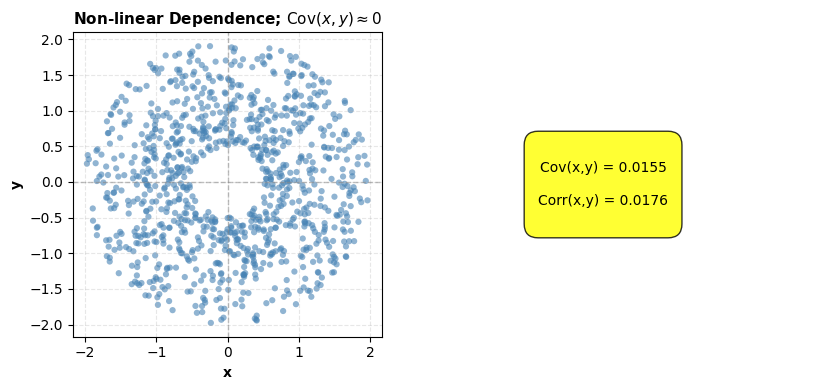

In [7]:
# Example: Zero Covariance but Dependent Variables (Non-linear relationship)

# Generate data with a circular/swirl pattern
n_samples = 1000
theta = rng.uniform(0, 2 * np.pi, n_samples)
r = rng.uniform(0.5, 2, n_samples)

# Circular pattern - clearly dependent but zero covariance
x_circle = r * np.cos(theta)
y_circle = r * np.sin(theta)

# Compute statistics
cov_circle = np.cov(x_circle, y_circle)[0, 1]
corr_circle = np.corrcoef(x_circle, y_circle)[0, 1]

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={"width_ratios": [3, 1]})

# Left plot: Scatter plot
ax = axes[0]
ax.scatter(x_circle, y_circle, alpha=0.6, s=20, color="steelblue", edgecolors="none")
ax.axhline(0, color="gray", linestyle="--", linewidth=1, alpha=0.5)
ax.axvline(0, color="gray", linestyle="--", linewidth=1, alpha=0.5)
ax.set_xlabel("x", fontsize=10, fontweight="bold")
ax.set_ylabel("y", fontsize=10, fontweight="bold")
ax.set_title(r"Non-linear Dependence; $\text{Cov}(x,y) \approx 0$", fontsize=11, fontweight="bold")
ax.set_aspect("equal")
ax.grid(alpha=0.3, linestyle="--")

# Right plot: Statistics text box
ax = axes[1]
ax.axis("off")
textstr = f"""
Cov(x,y) = {cov_circle:.4f}

Corr(x,y) = {corr_circle:.4f}
"""
ax.text(
    0.2,
    0.5,
    textstr,
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="center",
    horizontalalignment="center",
    bbox={"boxstyle": "round", "facecolor": "yellow", "alpha": 0.8, "pad": 1},
)

plt.tight_layout()
plt.show()

Bij echte onafhankelijke variabelen:

$$
\begin{align}
\text{Var}(x + y) &= \text{Var}(x) + \text{Var}(y) \\
\text{Cov}(x, y) &= 0
\end{align}
$$

Covariantie van {u}`lineaire transformaties`:  

$$
\text{Cov}(ax + b, cy + d) = ac \cdot \text{Cov}(x, y)
$$

:::{important}
(target-covariance-matrix)=
Bij een vectoriële random variabele $\pmb{\text{x}}$ hebben we te maken met een **covariantiematrix**.
De covariantiematrix $\pmb{\Sigma}$ voor een random vector $\pmb{x} = (x_1, x_2, \ldots, x_n)^T$ is een $n \times n$ symmetrische matrix:

$$
\pmb{\Sigma} = \text{Cov}(\pmb{x}) = \mathbb{E}[(\pmb{x} - \pmb{\mu})(\pmb{x} - \pmb{\mu})^T]
$$

waarbij $\pmb{\mu} = \mathbb{E}[\pmb{x}]$.

De elementen zijn:
$$
\pmb{\Sigma}_{ij} = \text{Cov}(x_i, x_j)
$$

- Diagonaal ($i = j$) $\pmb{\Sigma}_{ii} = \text{Var}(x_i)$: de varianties van de individuele realisaties
- Off-diagonal ($i \neq j$) $\pmb{\Sigma}_{ij}$: de covarianties tussen verschillende variabelen
:::

#### Correlatie

(target-correlation)=
De **correlatiecoëfficiënt** (of **Pearson-correlatie**) is de genormaliseerde versie van covariantie:

$$
\rho_{xy} = \text{Corr}(x, y) = \frac{\text{Cov}(x, y)}{\sigma_x \sigma_y} = \frac{\text{Cov}(x, y)}{\sqrt{\text{Var}(x)\text{Var}(y)}}
$$

Eigenschappen:
- Bereik: $-1 \leq \rho_{xy} \leq 1$
- $\rho_{xy} = 1$: Perfecte positieve lineaire relatie ($y = ax + b$ met $a > 0$)
- $\rho_{xy} = -1$: Perfecte negatieve lineaire relatie ($y = ax + b$ met $a < 0$)
- $\rho_{xy} = 0$: Geen lineaire correlatie (variabelen zijn _ongecorreleerd_; niet automatisch onafhankelijk)
- In tegenstelling tot de covariantie wordt deze maat niet beïnvloed door de schaal van $\text{x}$ en $\text{y}$

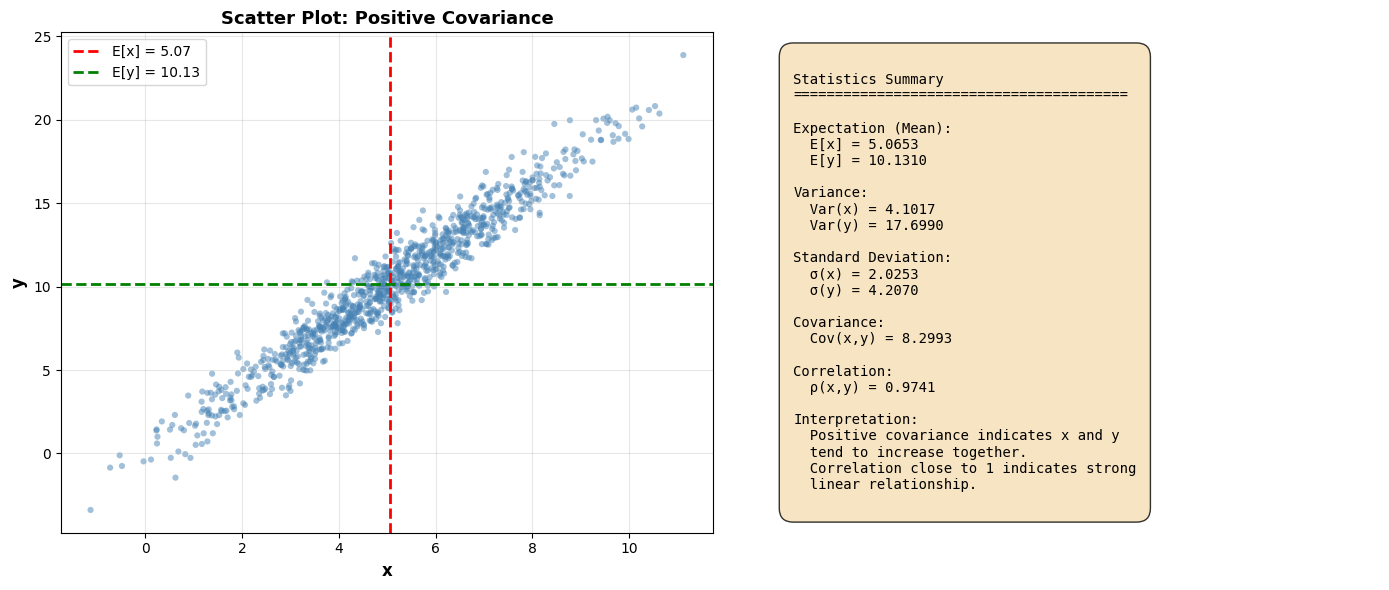

In [8]:
# Example: Central Tendency, Moments, and Covariance
# Generate correlated data
n_samples = 1000
x = rng.normal(5, 2, n_samples)
y = 2 * x + rng.normal(0, 1, n_samples)  # y is linearly related to x with noise

# Compute statistics
mean_x = np.mean(x)
mean_y = np.mean(y)
var_x = np.var(x)
var_y = np.var(y)
cov_xy = np.cov(x, y)[0, 1]
correlation = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot
ax = axes[0]
ax.scatter(x, y, alpha=0.5, s=20, color="steelblue", edgecolors="none")
ax.axvline(mean_x, color="red", linestyle="--", linewidth=2, label=f"E[x] = {mean_x:.2f}")
ax.axhline(mean_y, color="green", linestyle="--", linewidth=2, label=f"E[y] = {mean_y:.2f}")
ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("y", fontsize=12, fontweight="bold")
ax.set_title("Scatter Plot: Positive Covariance", fontsize=13, fontweight="bold")
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

# Statistics table
ax = axes[1]
ax.axis("off")
stats_text = f"""
Statistics Summary
{"=" * 40}

Expectation (Mean):
  E[x] = {mean_x:.4f}
  E[y] = {mean_y:.4f}

Variance:
  Var(x) = {var_x:.4f}
  Var(y) = {var_y:.4f}

Standard Deviation:
  σ(x) = {np.sqrt(var_x):.4f}
  σ(y) = {np.sqrt(var_y):.4f}

Covariance:
  Cov(x,y) = {cov_xy:.4f}

Correlation:
  ρ(x,y) = {correlation:.4f}

Interpretation:
  Positive covariance indicates x and y 
  tend to increase together.
  Correlation close to 1 indicates strong
  linear relationship.
"""
ax.text(
    0.1,
    0.5,
    stats_text,
    fontsize=10,
    family="monospace",
    verticalalignment="center",
    bbox={"boxstyle": "round", "facecolor": "wheat", "alpha": 0.8, "pad": 1},
)

plt.tight_layout()
plt.show()

## Centrummaten

(target-central-tendency)=
Bij het beschrijven van een kansverdeling is het vaak nuttig om de verdeling te karakteriseren met een beperkt aantal representatieve waarden. De meest gebruikte maten zijn **centrummaten** (_measures of central tendency_). Deze geven aan waar het "zwaartepunt" van een kansverdeling ligt.

### Verwachte waarde

(target-expectation)=
De **verwachte waarde** $\mathbb{E}[\text{x}]$ of $\mu$ is het gemiddelde dat we verwachten bij een oneindige steekproefgrootte.

Voor discrete kansvariabelen vermenigvuldigen we elke mogelijke waarde met zijn kans en tellen alles op:
$$
\mathbb{E}[x] = \sum_x x \cdot P(x)
$$

Voor continue kansvariabelen integreren we $x$ vermenigvuldigd met de kansdichtheid:
$$
\mathbb{E}[x] = \int x \cdot p(x) dx
$$

:::{note} 🌍
:icon: false
:class: simple
Bij een eerlijke dobbelsteen:
$$
\mathbb{E}[x] = 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + 3 \cdot \frac{1}{6} + 4 \cdot \frac{1}{6} + 5 \cdot \frac{1}{6} + 6 \cdot \frac{1}{6} = 3.5
$$
:::
(target-lineair-expectation)=
Verwachte waarden van {u}`lineaire transformaties`:

$$
\begin{align}
\mathbb{E}[ax + b] &= a \cdot \mathbb{E}[x] + b \\
\mathbb{E}[x + y] &= \mathbb{E}[x] + \mathbb{E}[y] \quad
\end{align}
$$

### Mediaan

(target-median)=
De **mediaan** is de waarde waarbij 50% van de kansmassa links en 50% rechts ligt. Bij scheve verdelingen verschilt deze van de verwachtingswaarde.

Voor een continue random variabele $\text{x}$ met PDF $p(x)$ is de mediaan $m$ gedefinieerd als:
$$
P(\text{x} \leq m) = P(\text{x} \geq m) = 0.5
$$

### Modus

(target-mode)=
De **modus** is de meest waarschijnlijke waarde (bij discrete verdelingen) of waar de dichtheidsfunctie zijn maximum heeft (bij continue verdelingen).

Voor een continue verdeling:
$$
x^* = \arg\max_x p(x)
$$

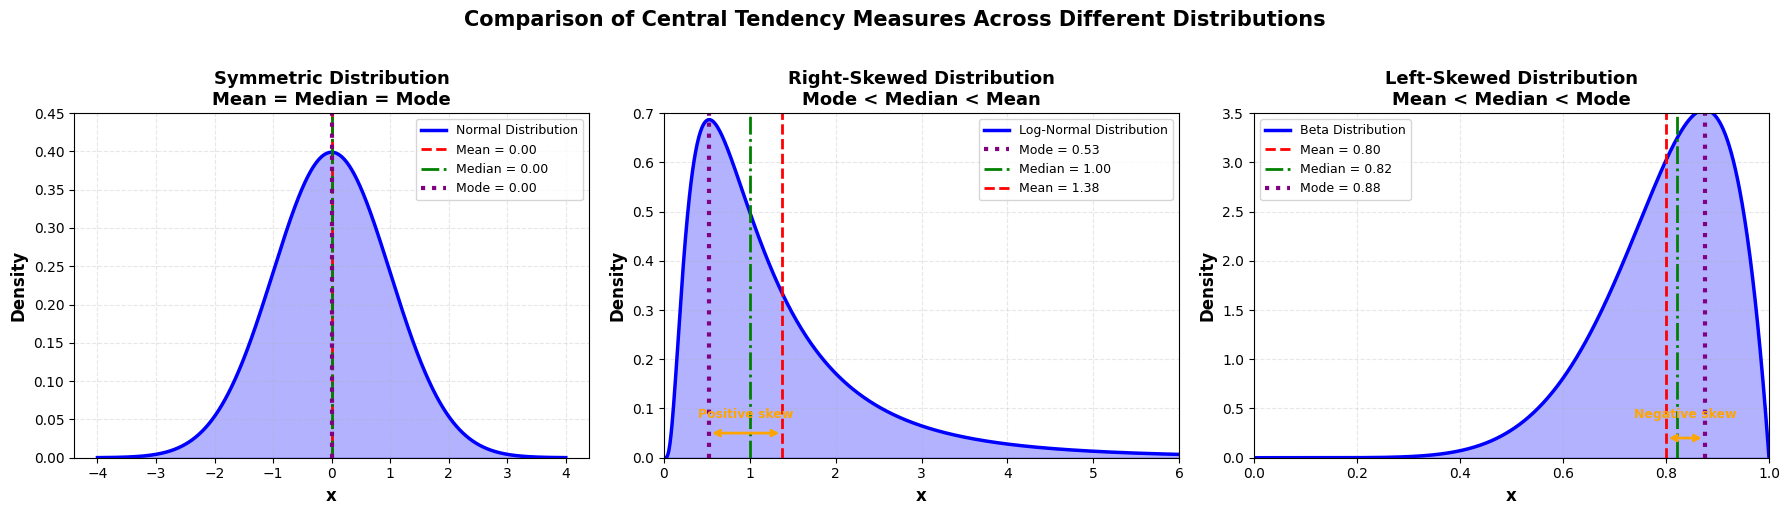

In [9]:
# Example: Comparing Mean, Median, and Mode across different distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Symmetric distribution (Normal): Mean = Median = Mode
ax = axes[0]
mu, sigma = 0, 1
x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

ax.plot(x, pdf, "b-", linewidth=2.5, label="Normal Distribution")
ax.fill_between(x, pdf, alpha=0.3, color="blue")

# Mean, median, mode are all the same
mean_val = mu
median_val = mu
mode_val = mu

ax.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f}")
ax.axvline(
    median_val, color="green", linestyle="-.", linewidth=2, label=f"Median = {median_val:.2f}"
)
ax.axvline(mode_val, color="purple", linestyle=":", linewidth=3, label=f"Mode = {mode_val:.2f}")

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Density", fontsize=12, fontweight="bold")
ax.set_title("Symmetric Distribution\nMean = Median = Mode", fontsize=13, fontweight="bold")
ax.legend(fontsize=9)
ax.grid(alpha=0.3, linestyle="--")
ax.set_ylim(0, 0.45)

# 2. Right-skewed distribution (Log-normal): Mode < Median < Mean
ax = axes[1]
s = 0.8  # shape parameter
x_pos = np.linspace(0.01, 6, 1000)
pdf_lognorm = stats.lognorm.pdf(x_pos, s)

ax.plot(x_pos, pdf_lognorm, "b-", linewidth=2.5, label="Log-Normal Distribution")
ax.fill_between(x_pos, pdf_lognorm, alpha=0.3, color="blue")

# Calculate statistics
mean_val = np.exp(s**2 / 2)
median_val = 1  # median of lognormal with scale=1
mode_val = np.exp(-(s**2))

ax.axvline(mode_val, color="purple", linestyle=":", linewidth=3, label=f"Mode = {mode_val:.2f}")
ax.axvline(
    median_val, color="green", linestyle="-.", linewidth=2, label=f"Median = {median_val:.2f}"
)
ax.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f}")

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Density", fontsize=12, fontweight="bold")
ax.set_title("Right-Skewed Distribution\nMode < Median < Mean", fontsize=13, fontweight="bold")
ax.legend(fontsize=9)
ax.grid(alpha=0.3, linestyle="--")
ax.set_xlim(0, 6)
ax.set_ylim(0, 0.7)

# Add annotation
ax.annotate(
    "",
    xy=(mean_val, 0.05),
    xytext=(mode_val, 0.05),
    arrowprops={"arrowstyle": "<->", "color": "orange", "lw": 2},
)
ax.text(
    (mode_val + mean_val) / 2,
    0.08,
    "Positive skew",
    ha="center",
    fontsize=9,
    color="orange",
    fontweight="bold",
)

# 3. Left-skewed distribution (Beta): Mean < Median < Mode
ax = axes[2]
a, b = 8, 2  # shape parameters for left skew
x_beta = np.linspace(0, 1, 1000)
pdf_beta = stats.beta.pdf(x_beta, a, b)

ax.plot(x_beta, pdf_beta, "b-", linewidth=2.5, label="Beta Distribution")
ax.fill_between(x_beta, pdf_beta, alpha=0.3, color="blue")

# Calculate statistics
mean_val = a / (a + b)
median_val = (a - 1 / 3) / (a + b - 2 / 3)  # approximation
mode_val = (a - 1) / (a + b - 2)

ax.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f}")
ax.axvline(
    median_val, color="green", linestyle="-.", linewidth=2, label=f"Median = {median_val:.2f}"
)
ax.axvline(mode_val, color="purple", linestyle=":", linewidth=3, label=f"Mode = {mode_val:.2f}")

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Density", fontsize=12, fontweight="bold")
ax.set_title("Left-Skewed Distribution\nMean < Median < Mode", fontsize=13, fontweight="bold")
ax.legend(fontsize=9)
ax.grid(alpha=0.3, linestyle="--")
ax.set_xlim(0, 1)
ax.set_ylim(0, 3.5)

# Add annotation
ax.annotate(
    "",
    xy=(mode_val, 0.2),
    xytext=(mean_val, 0.2),
    arrowprops={"arrowstyle": "<->", "color": "orange", "lw": 2},
)
ax.text(
    (mode_val + mean_val) / 2,
    0.4,
    "Negative skew",
    ha="center",
    fontsize=9,
    color="orange",
    fontweight="bold",
)

plt.suptitle(
    "Comparison of Central Tendency Measures Across Different Distributions",
    fontsize=15,
    fontweight="bold",
    y=1.02,
)
plt.tight_layout()
plt.show()

## Spreidingsmaten

Spreidingsmaten geven aan hoe sterk de waarden variëren rond het "zwaartepunt" van de verdeling. Ze kunnen ook gebruikt worden om na te gaan hoe (a)typisch een sample is, gegeven een bepaalde referentieverdeling.

### Variantie

(target-variance)=
De **variantie** $\text{Var}(x)$ of $\sigma^2$ meet hoe ver waarden gemiddeld van de verwachtingswaarde afliggen in gekwadrateerde eenheden.

#### Populatievariantie

Voor de theoretische kansverdeling (de populatie) gebruiken we:

$$
\sigma^2 = \text{Var}(x) = \mathbb{E}[(x - \mu)^2] = \mathbb{E}[x^2] - (\mathbb{E}[x])^2
$$

Voor discrete kansvariabelen:
$$
\text{Var}(x) = \sum_x (x - \mu)^2 \cdot P(x)
$$

Voor continue kansvariabelen:
$$
\text{Var}(x) = \int (x - \mu)^2 \cdot p(x) dx
$$

:::{note} 🌍
:icon: false
:class: simple
Stel dat een winkel dagelijks een aantal klanten ontvangt volgens een discrete kansverdeling:

| Aantal klanten ($x$) | 10 | 15 | 20 | 25 | 30 |
|:---:|:---:|:---:|:---:|:---:|:---:|
| Kans $P(x)$ | 0.1 | 0.2 | 0.4 | 0.2 | 0.1 |

Het verwachte aantal klanten per dag:
$$
\mu = 10(0.1) + 15(0.2) + 20(0.4) + 25(0.2) + 30(0.1) = 20
$$

De (populatie)variantie:
$$
\begin{align}
\sigma^2 &= (10-20)^2(0.1) + (15-20)^2(0.2) + (20-20)^2(0.4) \\
&\quad + (25-20)^2(0.2) + (30-20)^2(0.1) \\
&= 100(0.1) + 25(0.2) + 0(0.4) + 25(0.2) + 100(0.1) \\
&= 30
\end{align}
$$
:::

#### Steekproefvariantie

(target-sample-variance)=
In de praktijk kennen we de theoretische verdeling meestal niet en werken we met steekproeven. De **steekproefvariantie** $s^2$ schat de populatievariantie op basis van $n$ observaties $x_1, x_2, \ldots, x_n$:

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

waarbij $\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$ het steekproefgemiddelde is.

:::{important}
We delen door $n-1$ in plaats van $n$ om een onvertekende schatter (_unbiased estimator_) te krijgen. Dit heet Bessel's correctie en compenseert voor het feit dat we $\mu$ niet kennen en $\bar{x}$ gebruiken, wat systematisch dichter bij de steekproefwaarden ligt dan de werkelijke populatiegemiddelde.
:::

:::{note} 🌍
:icon: false
:class: simple
Veronderstel dat we in de winkel uit het vorige voorbeeld gedurende 5 dagen het aantal klanten observeren: $\{18, 22, 19, 21, 20\}$.

Steekproefgemiddelde:
$$
\bar{x} = \frac{18 + 22 + 19 + 21 + 20}{5} = \frac{100}{5} = 20
$$

Steekproefvariantie:
$$
\begin{align}
s^2 &= \frac{1}{5-1}\left[(18-20)^2 + (22-20)^2 + (19-20)^2 + (21-20)^2 + (20-20)^2\right] \\
&= \frac{1}{4}\left[4 + 4 + 1 + 1 + 0\right] \\
&= \frac{10}{4} = 2.5
\end{align}
$$

Merk op dat de steekproefvariantie ($s^2 = 2.5$) afwijkt van de populatievariantie ($\sigma^2 = 30$). Bij een grotere steekproef zou $s^2$ dichter bij $\sigma^2$ liggen.
:::

Variantie van {u}`lineaire transformaties`:
$$
\text{Var}(ax + b) = a^2 \cdot \text{Var}(x) \quad
$$

Wanneer we een constante $b$ optellen aan elke waarde, verschuiven we de hele verdeling, maar de afstanden tussen waarden blijven gelijk. De spreiding (variantie) verandert dus niet; constante $b$ heeft geen effect.
Wanneer we elke waarde vermenigvuldigen met $a$, worden alle afwijkingen tot het gemiddelde ook met $a$ vermenigvuldigd. Omdat variantie gedefinieerd is als het gemiddelde van de gekwadrateerde afwijkingen, wordt de factor gekwadrateerd: $(a \times \text{afwijking})^2 = a^2 \times \text{afwijking}^2$.

### Standaardafwijking

(target-std)=
De standaardafwijking (of standaarddeviatie) is de wortel van de populatie-/of steekproefvariantie:
$$
\begin{align}
\sigma &= \sqrt{\text{Var}(x)} \cr
s &= \sqrt{s^2}
\end{align}
$$

Dit geeft de spreiding in dezelfde eenheden als de originele variabele (niet gekwadrateerd), wat interpretatie makkelijker maakt.

Voor de dobbelsteen: $\sigma \approx \sqrt{2.92} \approx 1.71$

Merk op dat we deze maat reeds eerder zagen in de context van {ref}`standaardisatie van variabelen <target-standard-deviation>`.

### Interkwartielafstand

(target-percentiles)=
**Percentielen** (of **kwantielen**) verdelen de kansverdeling in gelijke delen. Het $P$-de percentiel is de waarde $x_P$ waarvoor geldt:

$$
P(\text{x} \leq x_P) = \frac{P}{100}
$$

Belangrijke percentielen:
- $P_{25}$ (eerste kwartiel, $Q_1$): 25% van de waarden ligt hieronder
- $P_{50}$ (tweede kwartiel, $Q_2$ of {ref}`mediaan <target-median>`): 50% van de waarden ligt hieronder
- $P_{75}$ (derde kwartiel, $Q_3$): 75% van de waarden ligt hieronder

(target-iqr)=
**Interkwartielafstand** (_Interquartile Range_, IQR):

In de context van empirische kansverdelingen, is de IQR een robuuste maat voor spreiding die minder gevoelig is voor toevallige uitschieters (_outliers_) dan de standaardafwijking:

$$
\text{IQR} = Q_3 - Q_1 = P_{75} - P_{25}
$$

De IQR bevat de middelste 50% van de verdeling en wordt vaak gebruikt om _outliers_ te detecteren tijdens exploratieve data analyse:
- Waarden onder $Q_1 - 1.5 \times \text{IQR}$ of boven $Q_3 + 1.5 \times \text{IQR}$ worden als mogelijke uitschieters beschouwd.

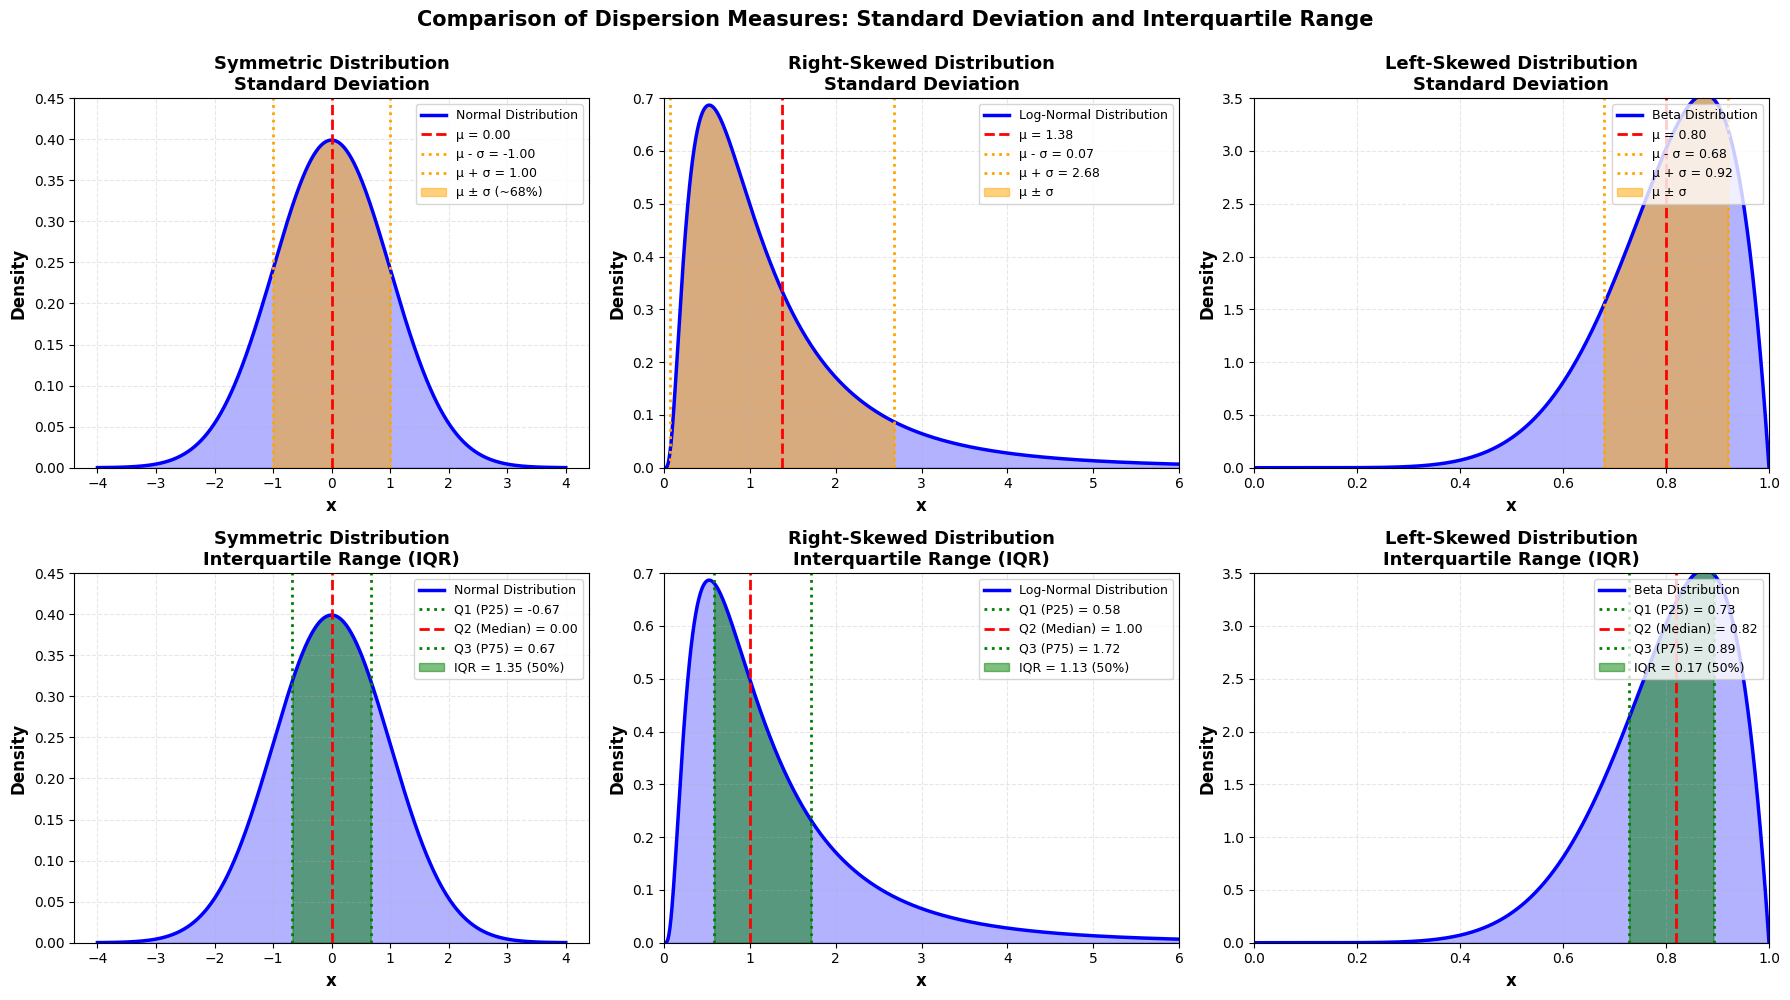

In [10]:
# Visualization of standard deviation and interquartile range
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Row 1: Standard Deviation
# Column 1: Symmetric distribution (Normal)
ax = axes[0, 0]
mu, sigma = 0, 1
x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

ax.plot(x, pdf, "b-", linewidth=2.5, label="Normal Distribution")
ax.fill_between(x, pdf, alpha=0.3, color="blue")

# Visualize standard deviation
ax.axvline(mu, color="red", linestyle="--", linewidth=2, label=f"μ = {mu:.2f}")
ax.axvline(
    mu - sigma, color="orange", linestyle=":", linewidth=2, label=f"μ - σ = {mu - sigma:.2f}"
)
ax.axvline(
    mu + sigma, color="orange", linestyle=":", linewidth=2, label=f"μ + σ = {mu + sigma:.2f}"
)

# Shade area within 1 standard deviation
mask_1std = (x >= mu - sigma) & (x <= mu + sigma)
ax.fill_between(x[mask_1std], pdf[mask_1std], alpha=0.5, color="orange", label="μ ± σ (~68%)")

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Density", fontsize=12, fontweight="bold")
ax.set_title("Symmetric Distribution\nStandard Deviation", fontsize=13, fontweight="bold")
ax.legend(fontsize=9, loc="upper right")
ax.grid(alpha=0.3, linestyle="--")
ax.set_ylim(0, 0.45)

# Column 2: Right-skewed distribution (Log-normal)
ax = axes[0, 1]
s = 0.8
x_pos = np.linspace(0.01, 6, 1000)
pdf_lognorm = stats.lognorm.pdf(x_pos, s)

ax.plot(x_pos, pdf_lognorm, "b-", linewidth=2.5, label="Log-Normal Distribution")
ax.fill_between(x_pos, pdf_lognorm, alpha=0.3, color="blue")

# Statistics
mean_val = np.exp(s**2 / 2)
std_val = mean_val * np.sqrt(np.exp(s**2) - 1)

ax.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"μ = {mean_val:.2f}")
ax.axvline(
    mean_val - std_val,
    color="orange",
    linestyle=":",
    linewidth=2,
    label=f"μ - σ = {mean_val - std_val:.2f}",
)
ax.axvline(
    mean_val + std_val,
    color="orange",
    linestyle=":",
    linewidth=2,
    label=f"μ + σ = {mean_val + std_val:.2f}",
)

# Shade area within 1 standard deviation
mask_1std = (x_pos >= mean_val - std_val) & (x_pos <= mean_val + std_val)
ax.fill_between(x_pos[mask_1std], pdf_lognorm[mask_1std], alpha=0.5, color="orange", label="μ ± σ")

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Density", fontsize=12, fontweight="bold")
ax.set_title("Right-Skewed Distribution\nStandard Deviation", fontsize=13, fontweight="bold")
ax.legend(fontsize=9, loc="upper right")
ax.grid(alpha=0.3, linestyle="--")
ax.set_xlim(0, 6)
ax.set_ylim(0, 0.7)

# Column 3: Left-skewed distribution (Beta)
ax = axes[0, 2]
a, b = 8, 2
x_beta = np.linspace(0, 1, 1000)
pdf_beta = stats.beta.pdf(x_beta, a, b)

ax.plot(x_beta, pdf_beta, "b-", linewidth=2.5, label="Beta Distribution")
ax.fill_between(x_beta, pdf_beta, alpha=0.3, color="blue")

# Statistics
mean_val = a / (a + b)
std_val = np.sqrt(a * b / ((a + b) ** 2 * (a + b + 1)))

ax.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"μ = {mean_val:.2f}")
ax.axvline(
    mean_val - std_val,
    color="orange",
    linestyle=":",
    linewidth=2,
    label=f"μ - σ = {mean_val - std_val:.2f}",
)
ax.axvline(
    mean_val + std_val,
    color="orange",
    linestyle=":",
    linewidth=2,
    label=f"μ + σ = {mean_val + std_val:.2f}",
)

# Shade area within 1 standard deviation
mask_1std = (x_beta >= mean_val - std_val) & (x_beta <= mean_val + std_val)
ax.fill_between(x_beta[mask_1std], pdf_beta[mask_1std], alpha=0.5, color="orange", label="μ ± σ")

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Density", fontsize=12, fontweight="bold")
ax.set_title("Left-Skewed Distribution\nStandard Deviation", fontsize=13, fontweight="bold")
ax.legend(fontsize=9, loc="upper right")
ax.grid(alpha=0.3, linestyle="--")
ax.set_xlim(0, 1)
ax.set_ylim(0, 3.5)

# Row 2: Interquartile Range (IQR)
# Column 1: Symmetric distribution (Normal)
ax = axes[1, 0]
ax.plot(x, pdf, "b-", linewidth=2.5, label="Normal Distribution")
ax.fill_between(x, pdf, alpha=0.3, color="blue")

# Quartile calculations
q1 = stats.norm.ppf(0.25, mu, sigma)
q2 = stats.norm.ppf(0.50, mu, sigma)  # median
q3 = stats.norm.ppf(0.75, mu, sigma)
iqr = q3 - q1

ax.axvline(q1, color="green", linestyle=":", linewidth=2, label=f"Q1 (P25) = {q1:.2f}")
ax.axvline(q2, color="red", linestyle="--", linewidth=2, label=f"Q2 (Median) = {q2:.2f}")
ax.axvline(q3, color="green", linestyle=":", linewidth=2, label=f"Q3 (P75) = {q3:.2f}")

# Shade IQR region (middle 50%)
mask_iqr = (x >= q1) & (x <= q3)
ax.fill_between(
    x[mask_iqr], pdf[mask_iqr], alpha=0.5, color="green", label=f"IQR = {iqr:.2f} (50%)"
)

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Density", fontsize=12, fontweight="bold")
ax.set_title("Symmetric Distribution\nInterquartile Range (IQR)", fontsize=13, fontweight="bold")
ax.legend(fontsize=9, loc="upper right")
ax.grid(alpha=0.3, linestyle="--")
ax.set_ylim(0, 0.45)

# Column 2: Right-skewed distribution (Log-normal)
ax = axes[1, 1]
ax.plot(x_pos, pdf_lognorm, "b-", linewidth=2.5, label="Log-Normal Distribution")
ax.fill_between(x_pos, pdf_lognorm, alpha=0.3, color="blue")

# Quartile calculations
q1 = stats.lognorm.ppf(0.25, s)
q2 = stats.lognorm.ppf(0.50, s)
q3 = stats.lognorm.ppf(0.75, s)
iqr = q3 - q1

ax.axvline(q1, color="green", linestyle=":", linewidth=2, label=f"Q1 (P25) = {q1:.2f}")
ax.axvline(q2, color="red", linestyle="--", linewidth=2, label=f"Q2 (Median) = {q2:.2f}")
ax.axvline(q3, color="green", linestyle=":", linewidth=2, label=f"Q3 (P75) = {q3:.2f}")

# Shade IQR region
mask_iqr = (x_pos >= q1) & (x_pos <= q3)
ax.fill_between(
    x_pos[mask_iqr], pdf_lognorm[mask_iqr], alpha=0.5, color="green", label=f"IQR = {iqr:.2f} (50%)"
)

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Density", fontsize=12, fontweight="bold")
ax.set_title("Right-Skewed Distribution\nInterquartile Range (IQR)", fontsize=13, fontweight="bold")
ax.legend(fontsize=9, loc="upper right")
ax.grid(alpha=0.3, linestyle="--")
ax.set_xlim(0, 6)
ax.set_ylim(0, 0.7)

# Column 3: Left-skewed distribution (Beta)
ax = axes[1, 2]
ax.plot(x_beta, pdf_beta, "b-", linewidth=2.5, label="Beta Distribution")
ax.fill_between(x_beta, pdf_beta, alpha=0.3, color="blue")

# Quartile calculations
q1 = stats.beta.ppf(0.25, a, b)
q2 = stats.beta.ppf(0.50, a, b)
q3 = stats.beta.ppf(0.75, a, b)
iqr = q3 - q1

ax.axvline(q1, color="green", linestyle=":", linewidth=2, label=f"Q1 (P25) = {q1:.2f}")
ax.axvline(q2, color="red", linestyle="--", linewidth=2, label=f"Q2 (Median) = {q2:.2f}")
ax.axvline(q3, color="green", linestyle=":", linewidth=2, label=f"Q3 (P75) = {q3:.2f}")

# Shade IQR region
mask_iqr = (x_beta >= q1) & (x_beta <= q3)
ax.fill_between(
    x_beta[mask_iqr], pdf_beta[mask_iqr], alpha=0.5, color="green", label=f"IQR = {iqr:.2f} (50%)"
)

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Density", fontsize=12, fontweight="bold")
ax.set_title("Left-Skewed Distribution\nInterquartile Range (IQR)", fontsize=13, fontweight="bold")
ax.legend(fontsize=9, loc="upper right")
ax.grid(alpha=0.3, linestyle="--")
ax.set_xlim(0, 1)
ax.set_ylim(0, 3.5)

plt.suptitle(
    "Comparison of Dispersion Measures: Standard Deviation and Interquartile Range",
    fontsize=15,
    fontweight="bold",
    y=0.995,
)
plt.tight_layout()
plt.show()